### Convolutional Layers

Neurons in the first convolutional layer are not connected to every single pixel in the input image, only to the pixels in thier receptive fields. In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer. This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on. In a CNN each layer is represented in 3D, which makes it easier to match neuron with their correspo

![CNN layers](CNN_layers.png)

A neuron located in roe $i$, column $j$ of a given layer is connected to the outputs of the neurons in the previous layer located in rows $i$ to $i + f_h - 1$, columns $j$ to $j + f_w - 1$, where $f_h$ and $f_w$ are the height and width of the receptive field. In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, this is called *zero padding*.

![zero_padding](zero_padding.png)

It is also possible to connect a large input layer to a much smaller layer by spacing out the receptive fields. This is dramatically reduces the model's computational complexity. The shift from one recptive field to the next is called the *stride*.


In [2]:
# training a classifier following Pytorch tutorial
import torch;
import torchvision;
import torchvision.transforms as transforms;

In [6]:
# the output of torchvision dataset are PILImage images of range [0, 1]. 
# The dataset should be transformed to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
);

batch_size = 4;
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform);
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform);
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2);
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2);
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck');

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170M/170M [00:18<00:00, 9.46MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


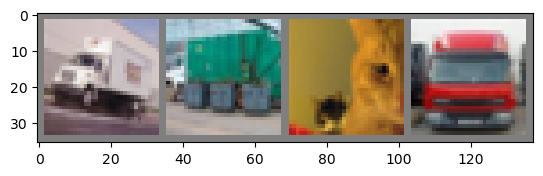

truck truck cat   truck


In [19]:
# display some training images
import matplotlib.pyplot as plt;
import numpy as np;

def imshow(img: torch.Tensor) -> ():
    if not isinstance(img, torch.Tensor):
        raise TypeError("img must be torch.Tensor");
    img = img / 2 + 0.5;
    npimg = img.numpy();
    plt.imshow(np.transpose(npimg, (1, 2, 0)));
    #plt.imshow(npimg);
    plt.show();

dataiter = iter(trainloader);
images, labels = next(dataiter);
imshow(torchvision.utils.make_grid(images));
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)));

In [22]:
import torch.nn as nn;
import torch.nn.functional as F;

class Net(nn.Module):
    def __init__(self):
        super().__init__();
        self.conv1 = nn.Conv2d(3, 6, 5);
        self.pool = nn.MaxPool2d(2, 2);
        self.conv2 = nn.Conv2d(6, 16, 5);
        self.fc1 = nn.Linear(16 * 5 * 5, 120);
        self.fc2 = nn.Linear(120, 84);
        self.fc3 = nn.Linear(84, 10);

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)));
        x = self.pool(F.relu(self.conv2(x)));
        x = torch.flatten(x, 1);
        x = F.relu(self.fc1(x));
        x = F.relu(self.fc2(x));
        x = self.fc3(x);
        return (x);

net = Net();